# Diabetic_Retinopathy_Detection

In [1]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('dr'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import cv2
from PIL import Image
import shutil

In [3]:
train = pd.read_csv("dr/aptos2019-blindness-detection/train.csv")

# Exploring Data

In [4]:
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
train.shape

(3662, 2)

In [6]:
train['diagnosis'].unique()

array([2, 4, 1, 0, 3])

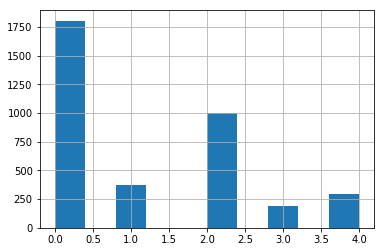

In [7]:
train.diagnosis.hist()

# Pre-processing

In [8]:
def showbyserverity():
    fig = plt.figure(figsize=(25, 16))
    for class_id in sorted(train['diagnosis'].unique()): 
        for i, (idx, row) in enumerate(train.loc[train['diagnosis'] == class_id].sample(5, random_state=42).iterrows()):
            ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
            path=f"dr/aptos2019-blindness-detection/train_images/{row['id_code']}.png"
            image = cv2.imread(path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (256, 256))
            image = cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 50) ,-4 ,128)

            plt.imshow(image, cmap = 'gist_gray')
            ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )

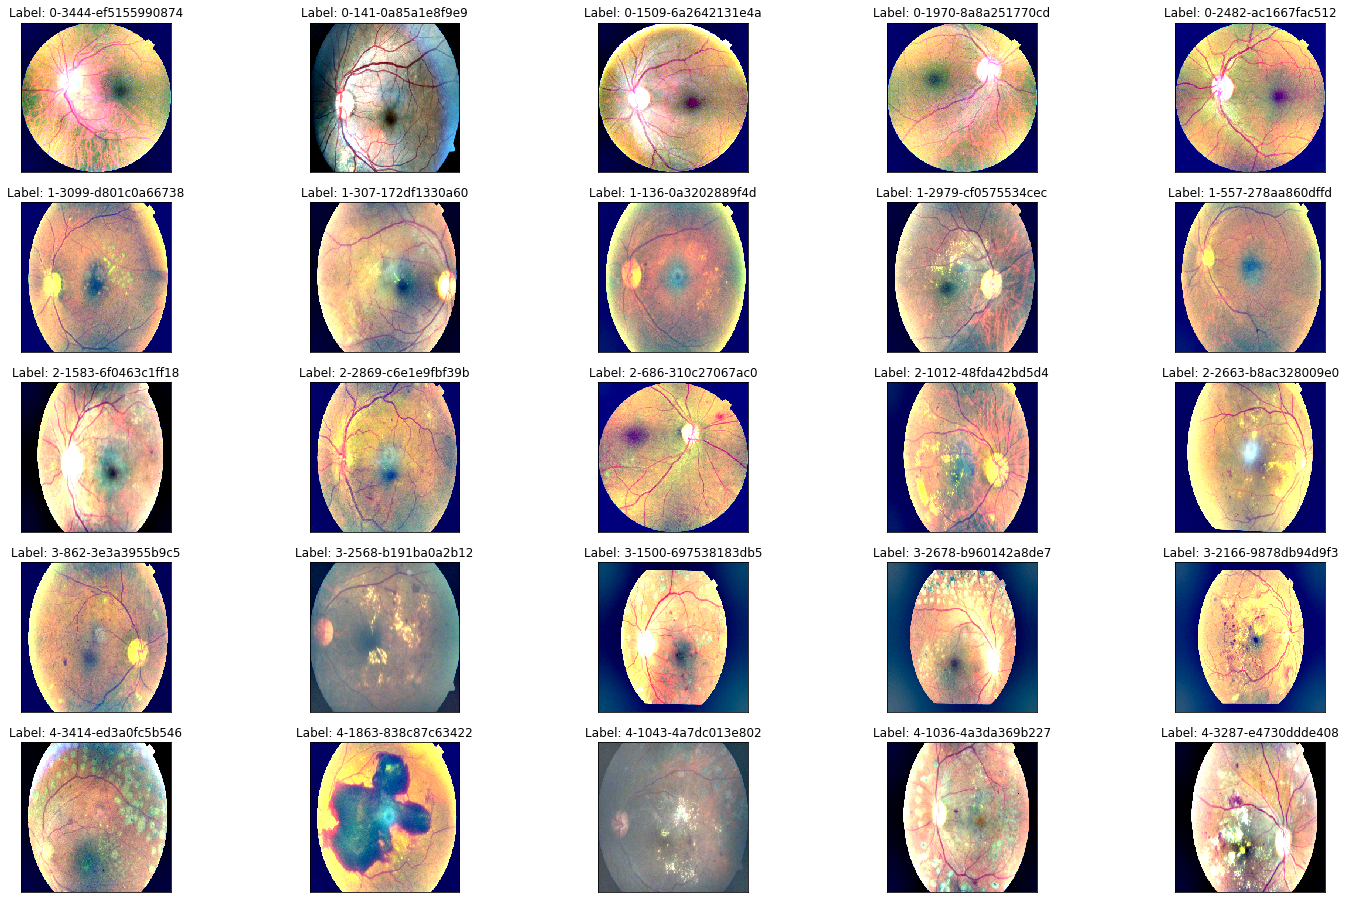

In [9]:
showbyserverity()

In [10]:
def label_img(name):
    if name == 0 : 
        return np.array([1, 0, 0, 0, 0])
    elif name == 1 : 
        return np.array([0, 1, 0, 0, 0])
    elif name == 2 : 
        return np.array([0, 0, 1, 0, 0])
    elif name == 3 : 
        return np.array([0, 0, 0, 1, 0])
    else:
        return np.array([0, 0, 0, 0, 1 ])

In [11]:
for class_id in sorted(train['diagnosis'].unique()):
    opath = f"dr/working/class_{class_id}"
    os.makedirs(opath)
    for i, (idx, row) in enumerate(train.loc[train['diagnosis'] == class_id].iterrows()):
        path=f"dr/aptos2019-blindness-detection/train_images/{row['id_code']}.png"
        shutil.copy(path,opath)

In [12]:
print(os.listdir("dr/working"))

['class_2', 'class_3', 'class_0', 'class_1', 'class_4']


In [13]:
# shutil.rmtree("dr/working")

Verifying the count of individual number of images in each id

In [14]:
for i in range(5):
    opath = f"dr/working/class_{i}"
    list = os.listdir(opath)
    print(len(list))

1805
370
999
193
295


In [15]:
!pip install Augmentor

In [16]:
 import Augmentor

In [17]:
def offline_augmentor(path, size, output_dir):
    p = Augmentor.Pipeline(path,output_dir)
    
    p.rotate(probability=0.5, max_left_rotation=25, max_right_rotation=25)
    p.flip_left_right(probability=0.5)
    p.flip_top_bottom(probability=0.5)
    p.zoom(probability=0.5, min_factor=0.75, max_factor=1.3)
    p.crop_random(probability=0.5, percentage_area=0.9)
    p.resize(probability=1.0, width=512, height=512)
    p.sample(size)

In [18]:
path = 'dr/working/class_1'
size = 1400
output_dir='dr/working/class_1/output'

offline_augmentor(path, size, output_dir)

Executing Pipeline:   0%|          | 0/1400 [00:00<?, ? Samples/s]

Initialised with 370 image(s) found.
Output directory set to dr/working/class_1/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7FEB78326AC8>: 100%|██████████| 1400/1400 [12:35<00:00,  1.85 Samples/s]


In [19]:
path = 'dr/working/class_2'
size = 800
output_dir='dr/working/class_2/output'

offline_augmentor(path, size, output_dir)

Executing Pipeline:   0%|          | 0/800 [00:00<?, ? Samples/s]

Initialised with 999 image(s) found.
Output directory set to dr/working/class_2/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7FEB7B606908>: 100%|██████████| 800/800 [07:43<00:00,  1.73 Samples/s]


In [20]:
path = 'dr/working/class_3'
size = 1600
output_dir='dr/working/class_3/output'

offline_augmentor(path, size, output_dir)

Executing Pipeline:   0%|          | 0/1600 [00:00<?, ? Samples/s]

Initialised with 193 image(s) found.
Output directory set to dr/working/class_3/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7FEB782E0E80>: 100%|██████████| 1600/1600 [15:07<00:00,  1.76 Samples/s]


In [21]:
path = 'dr/working/class_4'
size = 1500
output_dir='dr/working/class_4/output'

offline_augmentor(path, size, output_dir)

Executing Pipeline:   0%|          | 0/1500 [00:00<?, ? Samples/s]

Initialised with 295 image(s) found.
Output directory set to dr/working/class_4/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7FEB7B50C518>: 100%|██████████| 1500/1500 [15:08<00:00,  1.65 Samples/s]


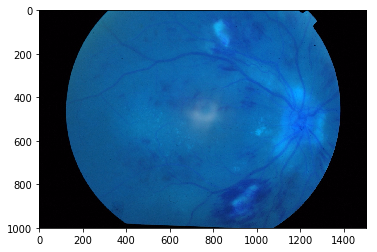

In [24]:
path=f"dr/aptos2019-blindness-detection/train_images/e019b3e0f33d.png"
image = cv2.imread(path)
plt.imshow(image)

In [25]:
train_image=[]
train_label=[]

In [26]:
for i in range(0,5):
    path = f"dr/working/class_{i}"
    for filename in os.listdir(path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            path_img = os.path.join(path,filename)
            image = cv2.imread(path_img)
            label = label_img(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (256, 256))
            image = cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 50) ,-4 ,128)
            train_image.append(np.array(image))
            train_label.append(label)
    if i!=0:
        path = f"dr/working/class_{i}/output"
        for filename in os.listdir(path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                path_img = os.path.join(path,filename)
                image = cv2.imread(path_img)
                label = label_img(i)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (256, 256))
                image = cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 50) ,-4 ,128)
                train_image.append(np.array(image))
                train_label.append(label)

In [27]:
train_image[255].shape

(256, 256, 3)

In [28]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(train_image, train_label, test_size = 0.25, random_state = 42)

xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.15, random_state=42)

In [29]:
type(xTrain)

list

In [30]:
xTrain = np.array(xTrain)
xTest = np.array(xTest)

In [31]:
yTrain = np.array(yTrain)
yTest = np.array(yTest)

In [32]:
xVal = np.array(xVal)
yVal = np.array(yVal)

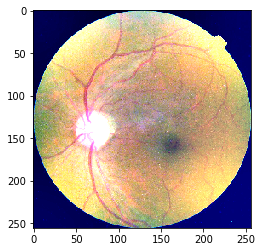

In [33]:
import matplotlib.pyplot as plt
plt.imshow(train_image[123], cmap = 'gist_gray')

In [34]:
sumy =[]

In [35]:
for i in range(len(yTrain)):
    index = np.argmax(yTrain[i])
    if index == 0:        
        sumy.append(0)
    elif index == 1: 
        sumy.append(1)
    elif index == 2: 
        sumy.append(2)
    elif index == 3:
        sumy.append(3)
    elif index == 4:
        sumy.append(4)

In [36]:
from collections import Counter

In [37]:
Counter(sumy)

Counter({1: 1114, 4: 1146, 0: 1139, 3: 1135, 2: 1178})

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation = 'softmax'))

Using TensorFlow backend.


In [39]:
for layer in model.layers:
    print(layer.output_shape)

(None, 254, 254, 32)
(None, 127, 127, 32)
(None, 127, 127, 32)
(None, 125, 125, 64)
(None, 62, 62, 64)
(None, 62, 62, 64)
(None, 60, 60, 64)
(None, 30, 30, 64)
(None, 30, 30, 64)
(None, 28, 28, 96)
(None, 14, 14, 96)
(None, 14, 14, 96)
(None, 12, 12, 32)
(None, 6, 6, 32)
(None, 6, 6, 32)
(None, 6, 6, 32)
(None, 1152)
(None, 128)
(None, 5)


In [40]:
from keras.optimizers import SGD
from keras import metrics
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics = [metrics.categorical_accuracy],optimizer='adam')

In [41]:
from keras.callbacks import ModelCheckpoint

In [42]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = 'val_categorical_accuracy',verbose=1, save_best_only=True)

In [ ]:
history = model.fit(xTrain, yTrain, batch_size=32, epochs=40,callbacks=[checkpointer],validation_data=(xVal,yVal))

In [44]:
model.load_weights('best_weights.hdf5')

In [45]:
model.save('model_1.h5')

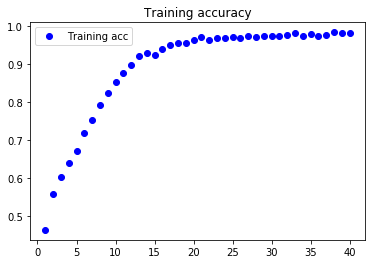

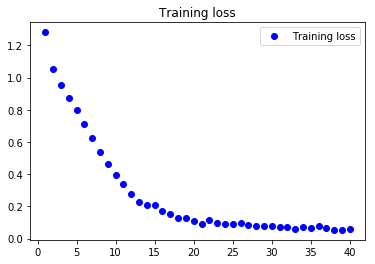

In [46]:
acc = history.history['categorical_accuracy']
loss = history.history['loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [47]:
yPred = model.predict(xTest)

In [48]:
result = []

In [49]:
for i in range(len(yPred)):
    index = np.argmax(yPred[i])
    if index == 0:        #According to one hot encoding above, 0 is Coronal, 1 is Horizontal and 2 is Sagittal.
        result.append(0)
    elif index == 1: 
        result.append(1)
    elif index == 2: 
        result.append(2)
    elif index == 3:
        result.append(3)
    elif index == 4:
        result.append(4)

In [50]:
result_test=[]

In [51]:
for i in range(len(yTest)):
    index = np.argmax(yTest[i])
    if index == 0:        #According to one hot encoding above, 0 is Coronal, 1 is Horizontal and 2 is Sagittal.
        result_test.append(0)
    elif index == 1: 
        result_test.append(1)
    elif index == 2: 
        result_test.append(2)
    elif index == 3:
        result_test.append(3)
    elif index == 4:
        result_test.append(4)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score,precision_recall_fscore_support

In [53]:
f1_score(result,result_test,average='macro')

0.6450764582931637

In [54]:
confusion_matrix(result,result_test)

array([[458,  16,  20,   0,   5],
       [  8, 303,  78,  28,  83],
       [  9,  43, 210,  63,  60],
       [  0,  28,  89, 306, 118],
       [  1,  30,  41,  51, 193]])

In [55]:
accuracy_score(result,result_test)

0.6559571619812584

In [56]:
loss, accuracy = model.evaluate(xTest,yTest, batch_size=32)
print(loss, accuracy)

2241/2241 [==============================] - 2s 1ms/step
1.662551865413858 0.6559571623802185


Model with the best hyperparameters from previous book

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu',kernel_initializer='uniform',input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='uniform'))
# model.add(Dropout(0.3))
model.add(Dense(5, activation = 'softmax',kernel_initializer='uniform'))

In [58]:
from keras.callbacks import ModelCheckpoint

In [59]:
from keras import metrics

model.compile(loss='categorical_crossentropy',metrics=[metrics.categorical_accuracy],optimizer='rmsprop')
checkpointer = ModelCheckpoint(filepath='best_weights.hdf5',monitor='val_categorical_accuracy',verbose=1,save_best_only=True)

In [ ]:
history = model.fit(xTrain, yTrain, batch_size=32, epochs=40,callbacks=[checkpointer],validation_data=(xVal,yVal))

In [61]:
model.load_weights('best_weights.hdf5')
model.save('model_2.h5')

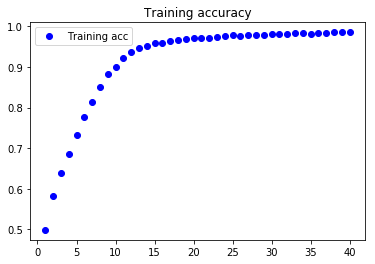

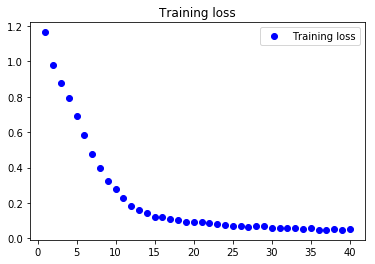

In [62]:
acc = history.history['categorical_accuracy']
loss = history.history['loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [63]:
yPred = model.predict(xTest)
result = []
for i in range(len(yPred)):
    index = np.argmax(yPred[i])
    if index == 0:        #According to one hot encoding above, 0 is Coronal, 1 is Horizontal and 2 is Sagittal.
        result.append(0)
    elif index == 1: 
        result.append(1)
    elif index == 2: 
        result.append(2)
    elif index == 3:
        result.append(3)
    elif index == 4:
        result.append(4)
result_test=[]
for i in range(len(yTest)):
    index = np.argmax(yTest[i])
    if index == 0:        #According to one hot encoding above, 0 is Coronal, 1 is Horizontal and 2 is Sagittal.
        result_test.append(0)
    elif index == 1: 
        result_test.append(1)
    elif index == 2: 
        result_test.append(2)
    elif index == 3:
        result_test.append(3)
    elif index == 4:
        result_test.append(4)

In [64]:
recall_score(result,result_test,average='macro')

0.6299065507098709

In [65]:
confusion_matrix(result,result_test)

array([[463,  11,  15,   1,   4],
       [  8, 279,  81,  32,  69],
       [  3,  67, 226,  82,  78],
       [  2,  31,  77, 277, 129],
       [  0,  32,  39,  56, 179]])

# Conclusion

We can conclude that by using data augmentaion we are able to make better model than the normal model with  imbalanced dataset 